<a href="https://colab.research.google.com/github/Timsar-ghost/-XGBClassifier/blob/Heart-Failure-Prediction/Project_2_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics

from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,cross_val_score
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier as XGB
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

In [108]:
df_heart = pd.read_csv('/content/heart.csv')

In [109]:
# Display the first (5) rows of the dataframe
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [110]:
## Display the number of rows and columns for the dataframe
df_heart.shape
print(f'There are {df_heart.shape[0]} rows, and {df_heart.shape[1]} columns.')
print(f'The rows represent {df_heart.shape[0]} observations, and the columns represent {df_heart.shape[1]-1} features and 1 target variable.')

There are 918 rows, and 12 columns.
The rows represent 918 observations, and the columns represent 11 features and 1 target variable.


In [111]:
## Display the column names and datatypes for each column
## Columns with mixed datatypes are identified as an object datatype
df_heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [112]:
#To inspect features and rows of the dataset
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [113]:
## Display the descriptive statistics for the numeric columns
df_heart.describe(include="number") # or 'object'

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [114]:
## Display the descriptive statistics for the non-numeric columns
df_heart.describe(exclude="number") # or 'object'

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [115]:
# Display the number of duplicate rows in the dataset
print(f'There are {df_heart.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [116]:
## Display column names and datatypes
df_heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [117]:
## Display column names
df_heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [118]:
# Display the total number of missing values
print(f'There are {df_heart.isna().sum().sum()} missing values.')

There are 0 missing values.


In [119]:
# Display the count of missing values by column
print(df_heart.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [120]:
#View statistical representation of data to research outliers
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [121]:
#Verifying there are no instances of 0 in the Cholesterol column
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [122]:
#To check data categories
for col in df_heart.select_dtypes('object'):
  print(df_heart[col].value_counts())

M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [123]:
#For categorical data statistics
df_heart.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


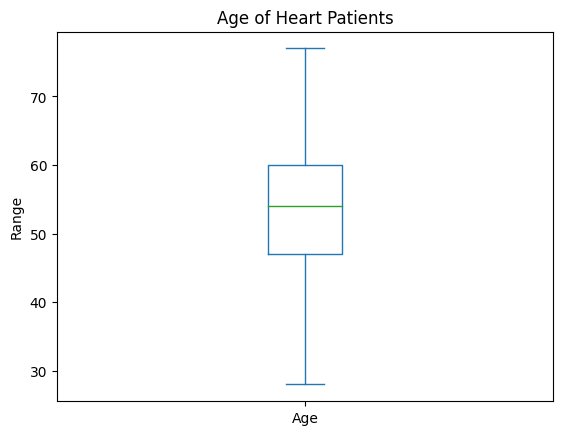

In [124]:
df_heart['Age'].plot(kind='box')
plt.title('Age of Heart Patients')
plt.ylabel('Range');

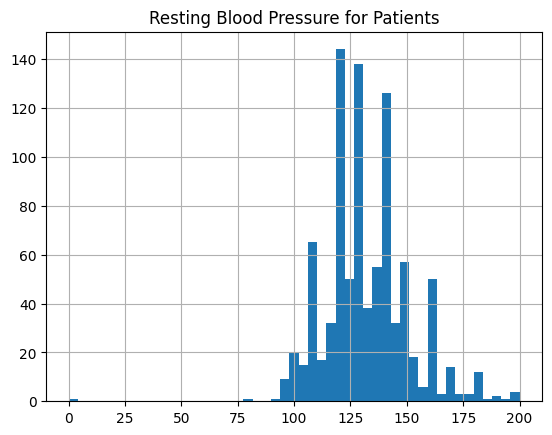

In [125]:
df_heart['RestingBP'].hist(bins='auto')
plt.title('Resting Blood Pressure for Patients')
plt.show()

<Axes: xlabel='Cholesterol'>

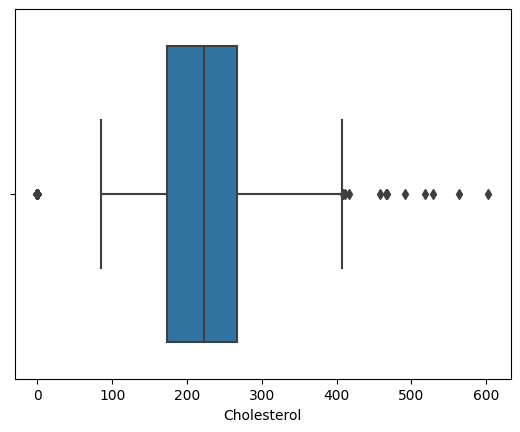

In [126]:

sns.boxplot(data = df_heart, x= 'Cholesterol')

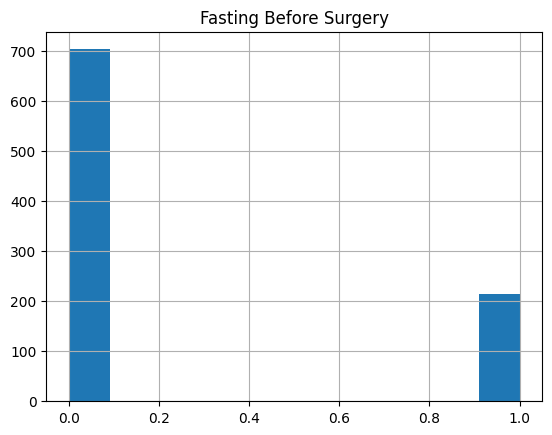

In [127]:
df_heart['FastingBS'].hist(bins='auto')
plt.title('Fasting Before Surgery')
plt.show()

<Axes: xlabel='MaxHR'>

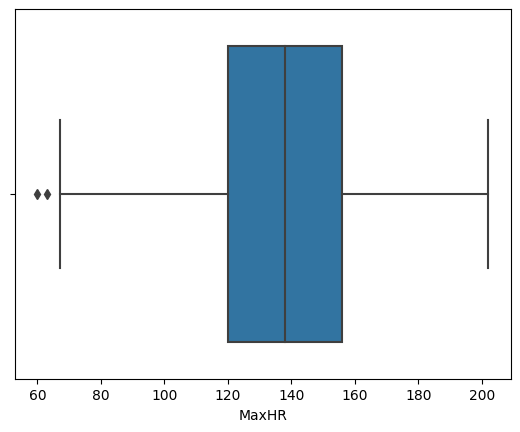

In [128]:
sns.boxplot(data = df_heart, x= 'MaxHR')

<Axes: >

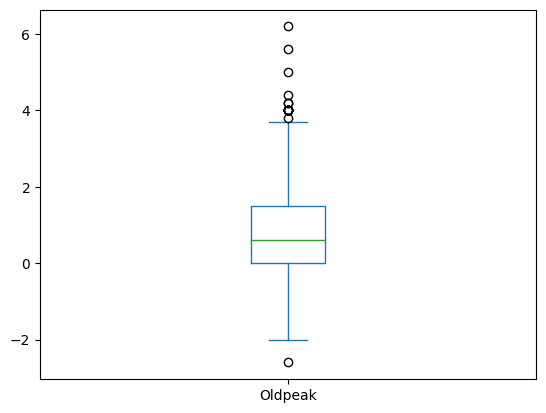

In [129]:
df_heart['Oldpeak'].plot(kind='box')

<Axes: xlabel='HeartDisease', ylabel='Count'>

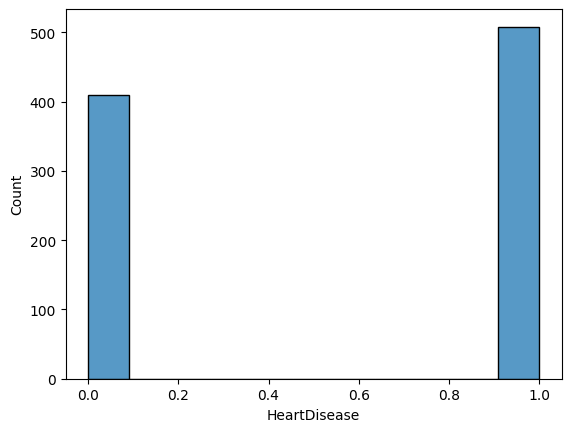

In [130]:
sns.histplot(data = df_heart, x = 'HeartDisease')

<Axes: xlabel='Sex', ylabel='Count'>

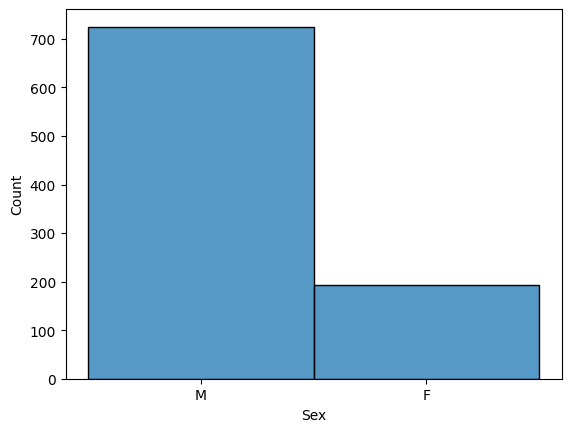

In [131]:
sns.histplot(data = df_heart, x = 'Sex')

<Axes: xlabel='ChestPainType', ylabel='Count'>

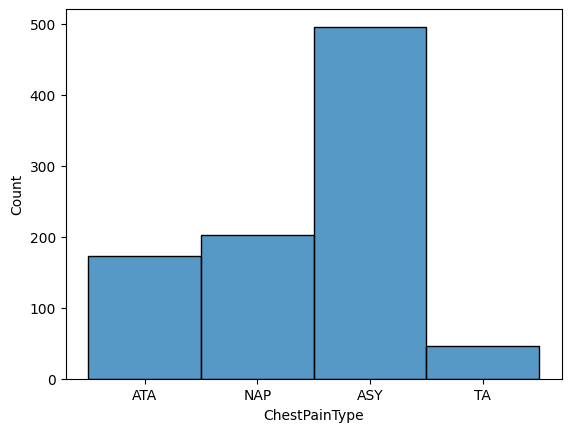

In [132]:
sns.histplot(data = df_heart, x = 'ChestPainType')

<Axes: xlabel='RestingECG', ylabel='Count'>

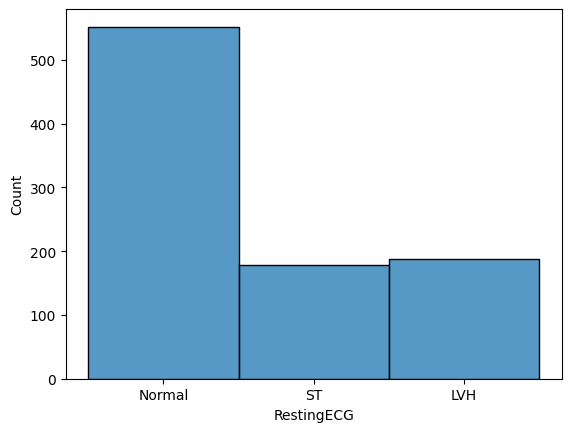

In [133]:
sns.histplot(data = df_heart, x = 'RestingECG')

<Axes: xlabel='RestingECG', ylabel='Count'>

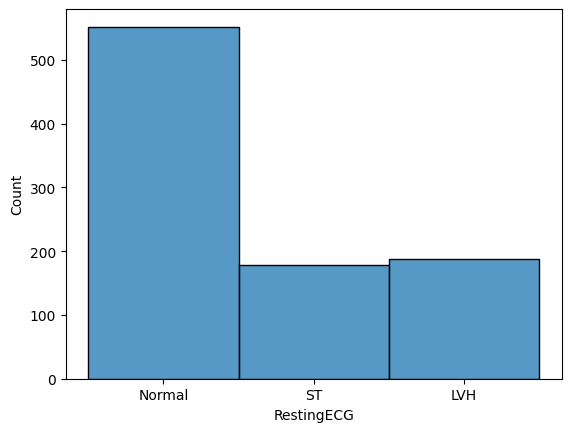

In [134]:
sns.histplot(data = df_heart, x = 'RestingECG')

<Axes: xlabel='ST_Slope', ylabel='Count'>

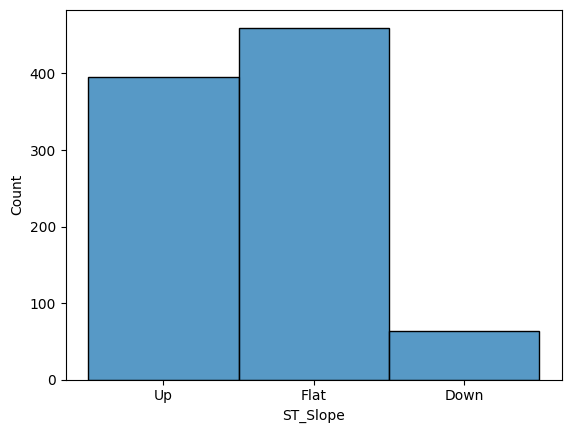

In [135]:
sns.histplot(data = df_heart, x = 'ST_Slope')

<Axes: >

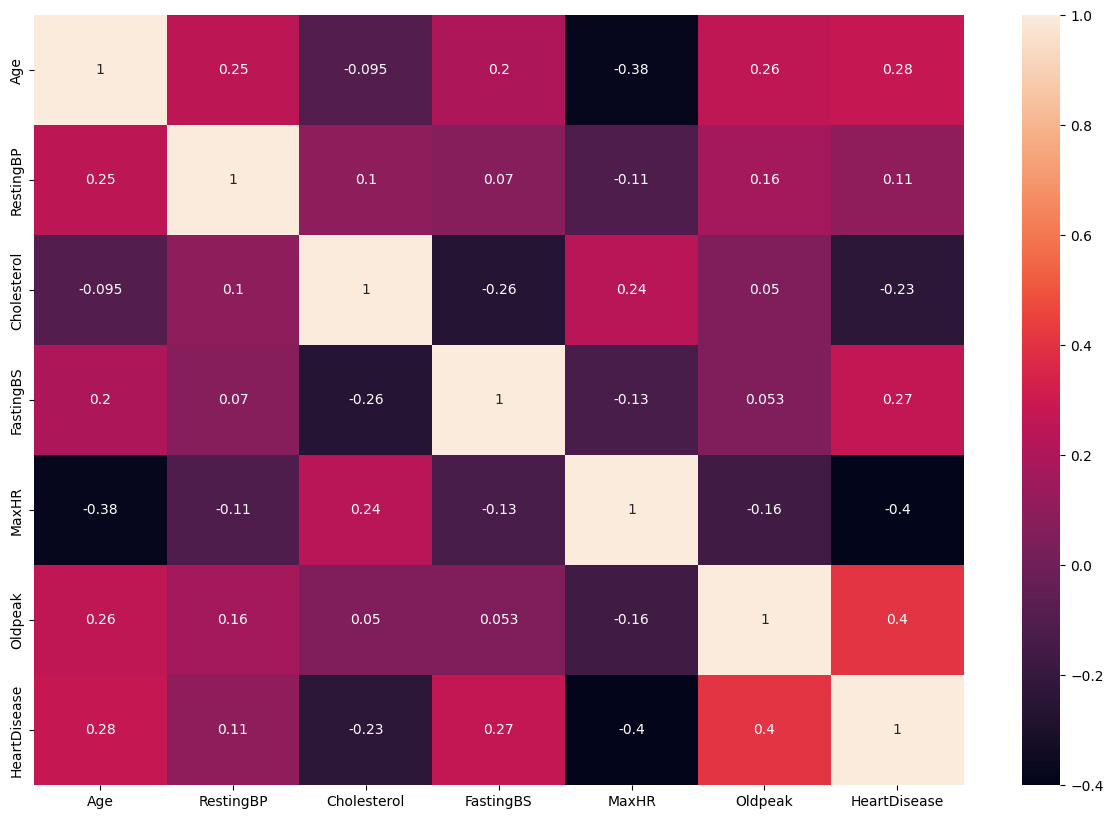

In [136]:
#To visualize correlation between Heart disease and other features
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_heart.corr(), annot= True, ax=ax)

Text(9.444444444444445, 0.5, 'ST depression')

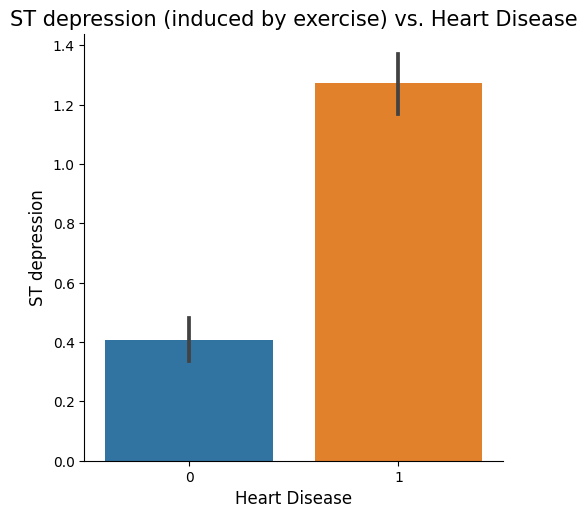

In [137]:
#To plot a barplot representing the relationship between ST depression and Heart Disease
sns.catplot(x="HeartDisease", y="Oldpeak", kind="bar", data=df_heart);

plt.title('ST depression (induced by exercise) vs. Heart Disease',size=15)
plt.xlabel('Heart Disease',size=12)
plt.ylabel('ST depression',size=12)

Text(0, 0.5, 'HeartDisease')

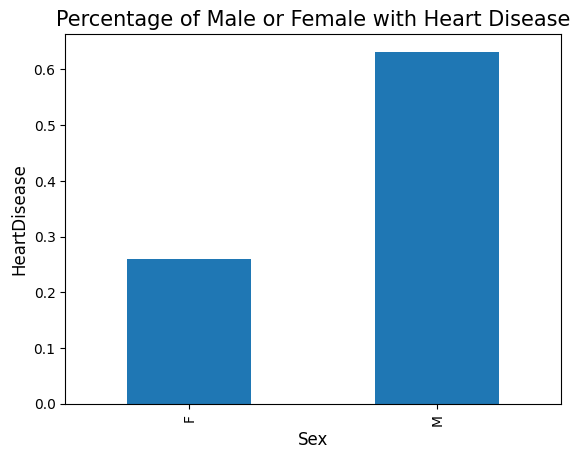

In [138]:
#To plot Percentage of Heart disease by gender

#Percentage of Heart disease by gender
df_groups = df_heart.groupby('Sex')['HeartDisease'].mean()

#create bar plot by group
df_groups.plot(kind='bar')

plt.title('Percentage of Male or Female with Heart Disease',size=15)
plt.xlabel('Sex',size=12)
plt.ylabel('HeartDisease',size=12)

In [139]:
#Creating variables for Age distribution

def bin_Age(Age):
  if Age < 45:
    return '0-45'
  elif Age < 50:
    return '45-50'
  elif Age < 55:
     return '50-55'
  elif Age < 60:
     return '55-60'
  elif Age < 65:
    return '60-65'
  elif Age < 70:
    return '65-70'
  else:
    return '70+'

In [140]:
#To apply Bin function for Age with a new column
df_heart['Age_Bin']= df_heart['Age'].apply(bin_Age)

#Verifying new column was created
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Bin
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0-45
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,45-50
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0-45
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,45-50
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,50-55


Text(0, 0.5, 'HeartDisease')

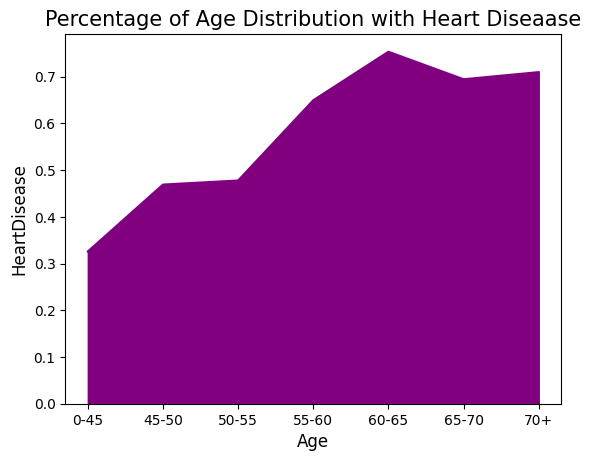

In [141]:
#Using Groupby to plot the Percentage of Age Distribution with Heart Disease
df_groups1 = df_heart.groupby('Age_Bin')['HeartDisease'].mean()

df_groups1.plot(kind='area', color= 'purple')

plt.title('Percentage of Age Distribution with Heart Diseaase',size=15)
plt.xlabel('Age',size=12)
plt.ylabel('HeartDisease',size=12)

In [142]:
#Define X and y
X = df_heart.drop('HeartDisease', axis=1)
y = df_heart['HeartDisease']

In [143]:
from sklearn.metrics import precision_score, recall_score, \
ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
set_config(display='diagram')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

In [145]:
y_train.value_counts(normalize=True)

1    0.553779
0    0.446221
Name: HeartDisease, dtype: float64

In [146]:
scaler = StandardScaler()
num_selector = make_column_selector(dtype_include= 'number')
num_tuple = (scaler, num_selector)
preprocessor = make_column_transformer(num_tuple, remainder='drop')

In [147]:
#Create a model pipeline with the preprocessor and a logistic regression model
log_reg = LogisticRegression()
log_pipe = make_pipeline(preprocessor, log_reg)
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd79ae12d70>)])),
                ('logisticregression', LogisticRegression())])

In [148]:
train_preds= log_pipe.predict(X_train)
train_preds[:5]

array([0, 1, 1, 0, 1])

In [149]:
test_preds= log_pipe.predict(X_test)
test_preds[:5]

array([1, 1, 1, 1, 1])

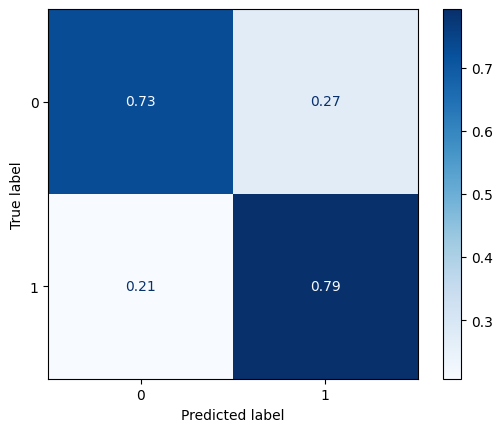

In [150]:
#Create a confusion matrix for the train set
ConfusionMatrixDisplay.from_predictions(y_train, train_preds, normalize='true', cmap='Blues');

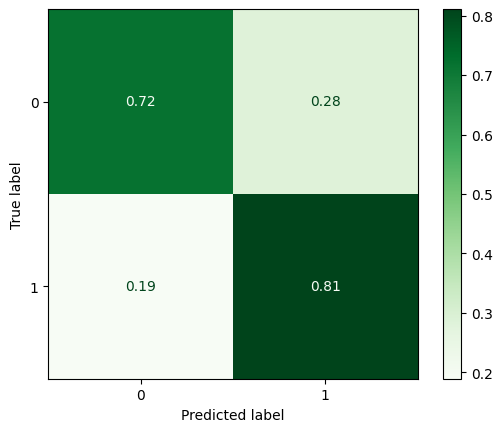

In [151]:
#Create a confusion matrix for testing set
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize='true', cmap='Greens');

In [153]:
#Convert Target to numeric Values
df_heart['Sex'] = df_heart['Sex'].replace({'B':0, 'M':1})
df_heart['RestingECG'] = df_heart['RestingECG'].replace({'Normal':0, 'ST':1})
df_heart['ST_Slope'] = df_heart['ST_Slope'].replace({'Flat':0, 'Up':1})

In [154]:
#make an instance of the model
logreg = LogisticRegression(C=0.03, max_iter=1000, solver='liblinear', penalty='l1')
#Create pipeline
logreg_pipe = make_pipeline(preprocessor, logreg)
#Trainging the model on the model on the data, storing the information learned from the data
#model is learning the relationship between X and y
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd79ae12d70>)])),
                ('logisticregression',
                 LogisticRegression(C=0.03, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [155]:
# Save the model's predictions for the train dataset
logreg_train_preds = logreg_pipe.predict(X_train)
# Save the model's predictions for the test dataset
logreg_test_preds = logreg_pipe.predict(X_test)

In [160]:
# Classification Report for the Train dataset
# Save the Classification Report
logreg_train_report = classification_report(y_train, logreg_train_preds)

In [161]:
# Print the Classification Report
print('Classification Report for Train\n')
print(logreg_train_report)

Classification Report for Train

              precision    recall  f1-score   support

           0       0.73      0.81      0.76       307
           1       0.83      0.75      0.79       381

    accuracy                           0.78       688
   macro avg       0.78      0.78      0.78       688
weighted avg       0.78      0.78      0.78       688



In [162]:
# Classification Report for the Test dataset
# Save the Classification Report
logreg_test_report = classification_report(y_test, logreg_test_preds)

In [163]:
# Print the Classification Report
print('Classification Report for Test\n')
print(logreg_test_report)

Classification Report for Test

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       103
           1       0.83      0.78      0.80       127

    accuracy                           0.79       230
   macro avg       0.79      0.79      0.79       230
weighted avg       0.79      0.79      0.79       230



In [164]:

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

ValueError: ignored